<a href="https://colab.research.google.com/github/StefanGarcziu/DeepLearning_5semester/blob/main/DL_Zad2_StepanGarciu_135843.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
%matplotlib inline

# **Simple visualization and classification of the digits dataset**

In [2]:
#import packages and load datasets

import numpy as np
import matplotlib.pyplot as plt

from sklearn import metrics
from sklearn.datasets import fetch_openml
from sklearn.neural_network import MLPClassifier
from sklearn.model_selection import train_test_split

# Load data from https://www.openml.org/d/554
X, y = fetch_openml('mnist_784', version=1, return_X_y=True)
X = X / 255.

# split the data into training and validation sets
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=33, train_size=0.5)

print("Image shape: ",X_train.shape)
# dimension of face image

Image shape:  (35000, 784)


# **Classify with MLP**

In [3]:
# tu musimy zdefiniować klasyfikator, wytrenowaći sprawdzić "score" dla 
# danych testowych
#Proponowane parametry sieci: ukryte warstwy [100,100],solver adam, verbose=10 

clf = MLPClassifier(hidden_layer_sizes=(100,100), activation='relu', learning_rate_init=0.001, early_stopping=True, alpha=0.1, solver='adam', verbose=10, validation_fraction=0.2, max_iter=1000)
                 

print(clf.fit(X_train, y_train))

# get score
score = clf.score(X_test, y_test)
print("Score = ",score)

# get prediction
Z = clf.predict_proba(X_test)[:,1] # returns probability 
print(Z)

Iteration 1, loss = 0.63688345
Validation score: 0.920857
Iteration 2, loss = 0.30355214
Validation score: 0.942571
Iteration 3, loss = 0.24240852
Validation score: 0.953857
Iteration 4, loss = 0.21075028
Validation score: 0.959143
Iteration 5, loss = 0.18711049
Validation score: 0.966000
Iteration 6, loss = 0.17177362
Validation score: 0.965857
Iteration 7, loss = 0.15665191
Validation score: 0.965286
Iteration 8, loss = 0.14547313
Validation score: 0.966571
Iteration 9, loss = 0.13619741
Validation score: 0.968143
Iteration 10, loss = 0.12813286
Validation score: 0.969857
Iteration 11, loss = 0.12290523
Validation score: 0.973571
Iteration 12, loss = 0.11857095
Validation score: 0.972857
Iteration 13, loss = 0.11454807
Validation score: 0.970000
Iteration 14, loss = 0.10786127
Validation score: 0.971571
Iteration 15, loss = 0.10641745
Validation score: 0.973143
Iteration 16, loss = 0.10302294
Validation score: 0.974857
Iteration 17, loss = 0.09949931
Validation score: 0.974857
Iterat

[0.9208571428571428, 0.9425714285714286, 0.9538571428571428, 0.9591428571428572, 0.966, 0.9658571428571429, 0.9652857142857143, 0.9665714285714285, 0.9681428571428572, 0.9698571428571429, 0.9735714285714285, 0.9728571428571429, 0.97, 0.9715714285714285, 0.9731428571428572, 0.9748571428571429, 0.9748571428571429, 0.9751428571428571, 0.9745714285714285, 0.9732857142857143, 0.9714285714285714, 0.9748571428571429, 0.9735714285714285, 0.971, 0.9742857142857143, 0.9755714285714285, 0.9744285714285714, 0.9748571428571429, 0.9735714285714285, 0.9748571428571429, 0.9751428571428571, 0.9727142857142858, 0.9738571428571429, 0.975, 0.973, 0.9735714285714285, 0.9737142857142858]


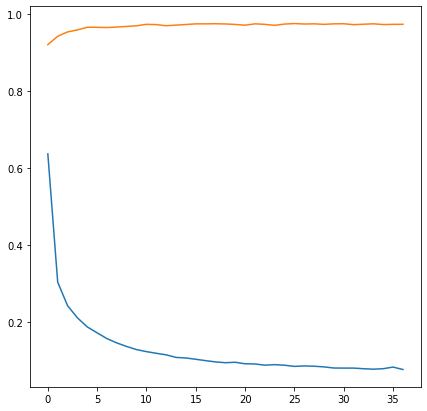

In [4]:
# tu rysujemy loss i validation score
fig=plt.figure(figsize=(7,7))

plt.plot(clf.loss_curve_)
#Warning: thiscan be usedonly if early_stopping=True
print(clf.validation_scores_)
plt.plot(np.asarray(clf.validation_scores_))

plt.show()

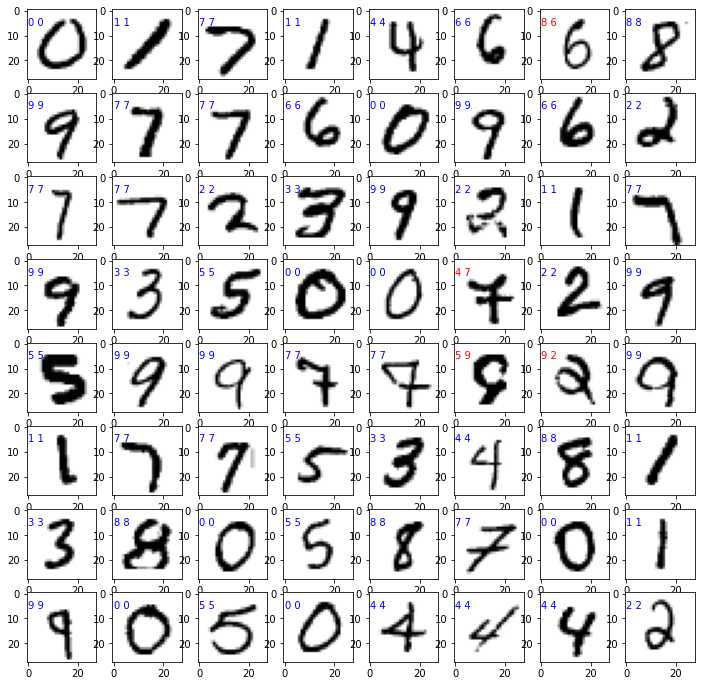

In [5]:
# Plot the prediction
fig = plt.figure(figsize=(12, 12)) #figure size in inches
predicted = clf.predict(X_test)

# Tu rysujemy cyfry z wynikami
#plot the digits: each image is 28x28 pixels
for i in range(64):
  ax = fig.add_subplot(8, 8, i + 1)
  ax.imshow(X_test[i].reshape(28,28),cmap=plt.cm.binary)
  if y_test[i] == predicted[i]:
    ax.text(0,6,predicted[i] + ' ' + y_test[i], color='blue')
  else:
    ax.text(0,6,predicted[i] + ' ' + y_test[i], color='red')

# **Print the confusion matrix (expected true label vs. the reconstructed label)**

In [6]:
print(metrics.classification_report(y_test, predicted))

              precision    recall  f1-score   support

           0       0.99      0.98      0.98      3409
           1       0.98      0.99      0.98      3949
           2       0.98      0.95      0.97      3500
           3       0.95      0.97      0.96      3557
           4       0.97      0.98      0.97      3398
           5       0.96      0.97      0.96      3203
           6       0.97      0.98      0.97      3444
           7       0.96      0.97      0.97      3637
           8       0.97      0.96      0.96      3437
           9       0.97      0.95      0.96      3466

    accuracy                           0.97     35000
   macro avg       0.97      0.97      0.97     35000
weighted avg       0.97      0.97      0.97     35000



In [7]:
print(metrics.confusion_matrix(y_test, predicted))

[[3346    0    4    3    2   15   28    2    6    3]
 [   0 3894   13   14    5    1    4    8    4    6]
 [  12    9 3337   31   16    7   18   56   12    2]
 [   2    5   18 3444    3   33    3   21   18   10]
 [   0    8    6    0 3323    1   13    8    4   35]
 [  11    8    5   28    4 3103   20    2   13    9]
 [   8    7    0    0   21   27 3370    0   11    0]
 [   2   10   13   11   14    8    1 3546    0   32]
 [   5   27   11   49    6   14   21   11 3283   10]
 [  10    9    0   33   43   24    2   26   23 3296]]


# **Repeat the same classification for faces**

In [8]:
####################################################
# Load dataset with faces
from sklearn.datasets import fetch_lfw_people

# #############################################################################
# Download the data, if not already on disk and load it as numpy arrays

lfw_people = fetch_lfw_people(min_faces_per_person=100, resize=0.50)  
print(lfw_people.images.shape)


# introspect the images arrays to find the shapes (for plotting)
n_samples, h, w = lfw_people.images.shape

# for machine learning we use the 2 data directly (as relative pixel
# positions info is ignored by this model)
X = lfw_people.data
n_features = X.shape[1]

# the label to predict is the id of the person
y = lfw_people.target
# to get real names, not digits
target_names = lfw_people.target_names

# split into a training and testing set
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.25, random_state=42)

print("Image shape: ",X_train.shape)
# dimension of face image
nfaces, h, w = lfw_people.images.shape
print("Image shape: ", h, w)

(1140, 62, 47)
Image shape:  (855, 2914)
Image shape:  62 47


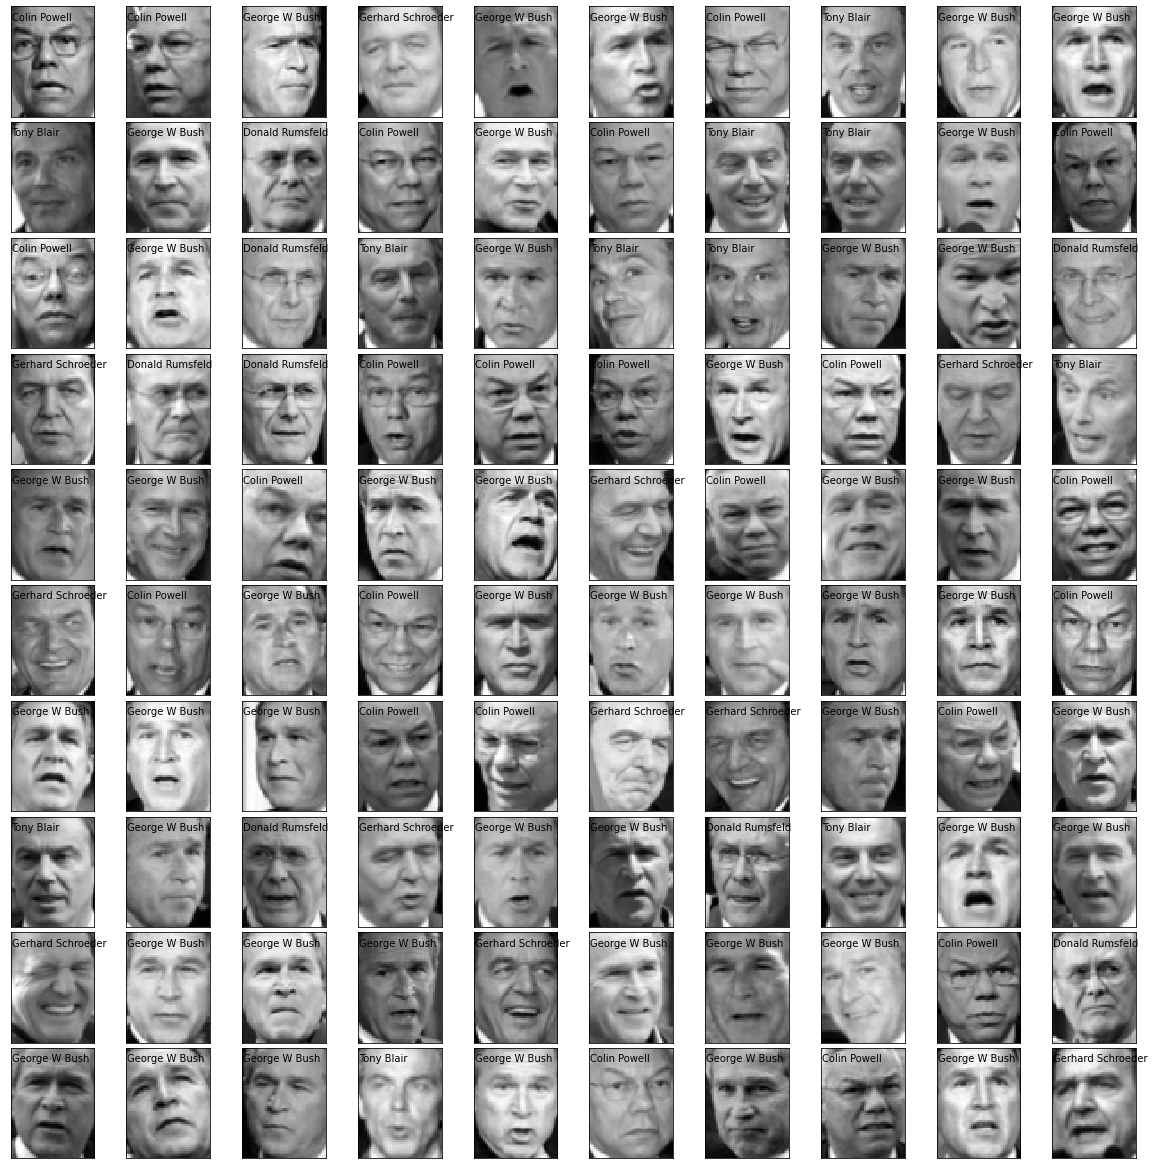

In [9]:
# tu rysujemy twarze
from matplotlib import pyplot as plt
fig = plt.figure(figsize=(16, 16)) # figure size in inches
fig.subplots_adjust(left=0, right=1, bottom=0, top=1, hspace=0.05, wspace=0.05)
for i in range(100):
  ax = fig.add_subplot(10, 10, i + 1, xticks=[], yticks=[])
  ax.imshow(X_test[i].reshape(h,w), cmap=plt.cm.gray, interpolation='nearest')
  # label the image with the target value
  ax.text(0, 7, str(target_names[y_test[i]]))

# **Classify with MLP**

In [10]:
# train the model
clf = MLPClassifier(hidden_layer_sizes=(100,100), activation='relu', alpha=1, learning_rate_init=0.001, early_stopping=True, 
                    solver='adam', verbose=10, validation_fraction=0.2, max_iter=1000, n_iter_no_change=90)                

print(clf.fit(X_train, y_train))

# get score
score = clf.score(X_test, y_test)
print("Score = ",score)

# get prediction
Z = clf.predict_proba(X_test)[:,1] # returns probability 
print(Z)

Iteration 1, loss = inf
Validation score: 0.087719
Iteration 2, loss = inf
Validation score: 0.479532
Iteration 3, loss = 108.97891918
Validation score: 0.479532
Iteration 4, loss = 71.24932048
Validation score: 0.216374
Iteration 5, loss = 54.05344434
Validation score: 0.134503
Iteration 6, loss = 85.53703234
Validation score: 0.105263
Iteration 7, loss = 54.73175151
Validation score: 0.485380
Iteration 8, loss = 46.26342680
Validation score: 0.298246
Iteration 9, loss = 55.27003387
Validation score: 0.409357
Iteration 10, loss = 31.67268098
Validation score: 0.292398
Iteration 11, loss = 16.92553902
Validation score: 0.567251
Iteration 12, loss = 24.96340637
Validation score: 0.292398
Iteration 13, loss = 38.38012834
Validation score: 0.081871
Iteration 14, loss = 33.25522028
Validation score: 0.479532
Iteration 15, loss = 20.04809517
Validation score: 0.520468
Iteration 16, loss = 17.31605675
Validation score: 0.491228
Iteration 17, loss = 16.85320369
Validation score: 0.216374
Iter

# **Plot loss**

[0.08771929824561403, 0.47953216374269003, 0.47953216374269003, 0.21637426900584794, 0.13450292397660818, 0.10526315789473684, 0.4853801169590643, 0.2982456140350877, 0.4093567251461988, 0.29239766081871343, 0.5672514619883041, 0.29239766081871343, 0.08187134502923976, 0.47953216374269003, 0.52046783625731, 0.49122807017543857, 0.21637426900584794, 0.5847953216374269, 0.5497076023391813, 0.49122807017543857, 0.543859649122807, 0.52046783625731, 0.5087719298245614, 0.47953216374269003, 0.4093567251461988, 0.6081871345029239, 0.6140350877192983, 0.6549707602339181, 0.5789473684210527, 0.5380116959064327, 0.6491228070175439, 0.6549707602339181, 0.6140350877192983, 0.6549707602339181, 0.6198830409356725, 0.4502923976608187, 0.4152046783625731, 0.5906432748538012, 0.6257309941520468, 0.6900584795321637, 0.6491228070175439, 0.6608187134502924, 0.4269005847953216, 0.5555555555555556, 0.6608187134502924, 0.7368421052631579, 0.6432748538011696, 0.5847953216374269, 0.6608187134502924, 0.73099415

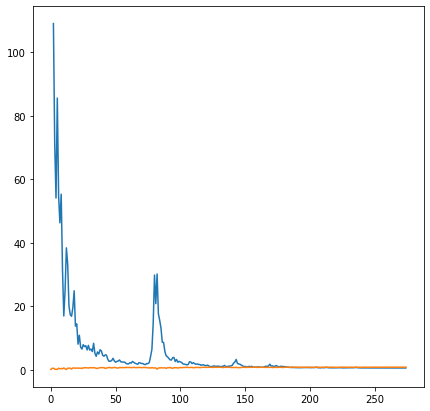

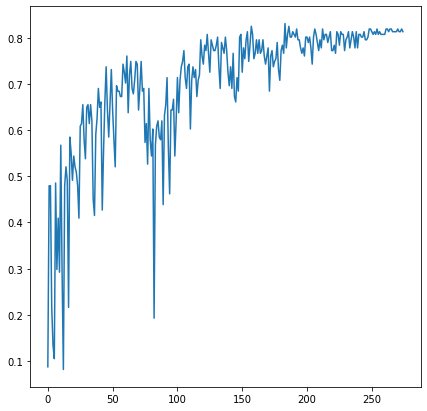

In [11]:
fig=plt.figure(figsize=(7,7))

plt.plot(clf.loss_curve_)
#Warning: thiscan be usedonly if early_stopping=True
print(clf.validation_scores_)
plt.plot(np.asarray(clf.validation_scores_))

plt.show()

fig=plt.figure(figsize=(7,7))

#plt.plot(clf.loss_curve_)
#Warning: thiscan be usedonly if early_stopping=True
plt.plot(np.asarray(clf.validation_scores_))

plt.show()

# **Plot results**

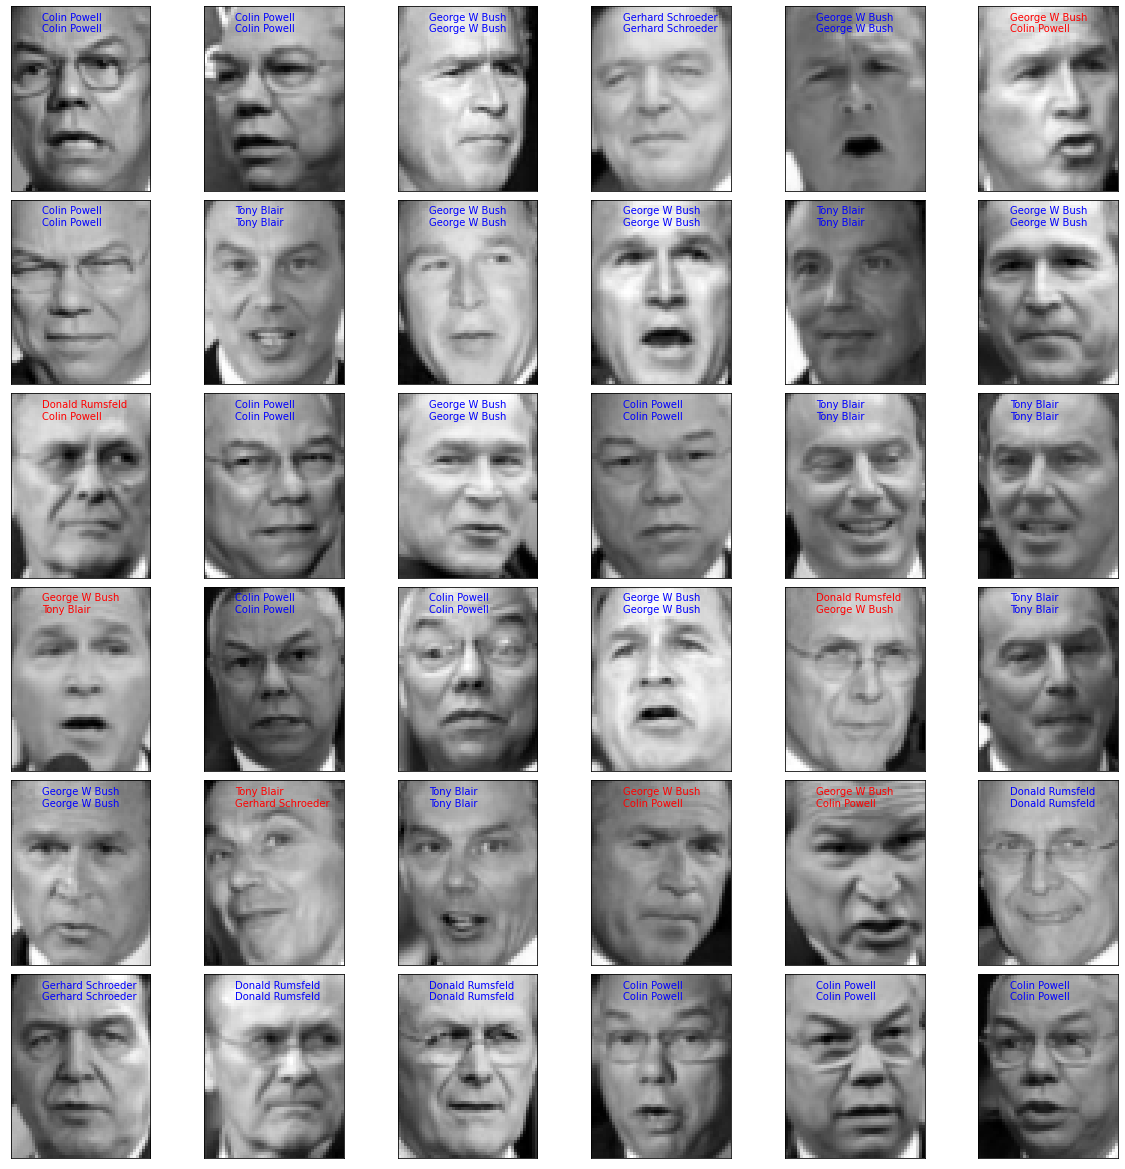

In [12]:
# Plot the prediction
predicted = clf.predict(X_test)

fig = plt.figure(figsize=(16, 16)) # figure size in inches
fig.subplots_adjust(left=0, right=1, bottom=0, top=1, hspace=0.05, wspace=0.05)
for i in range(36):
  ax = fig.add_subplot(6, 6, i + 1, xticks=[], yticks=[])
  ax.imshow(X_test[i].reshape(h,w), cmap=plt.cm.gray, interpolation='nearest')
  # label the image with the target value
  if y_test[i] == predicted[i]:
    ax.text(10, 8, str(target_names[y_test[i]]) +"\n"+ str(target_names[predicted[i]]), color='blue')
  else:
    ax.text(10, 8, str(target_names[y_test[i]]) +"\n"+ str(target_names[predicted[i]]), color='red')

Print the classification report

In [13]:
print(metrics.classification_report(y_test, predicted))

              precision    recall  f1-score   support

           0       0.79      0.89      0.84        64
           1       0.89      0.53      0.67        32
           2       0.85      0.83      0.84       127
           3       0.69      0.86      0.77        29
           4       0.76      0.76      0.76        33

    accuracy                           0.81       285
   macro avg       0.80      0.78      0.77       285
weighted avg       0.81      0.81      0.80       285



# **Print the confusion matrix (expected true label vs. the reconstructed label)**

In [14]:
print(metrics.confusion_matrix(y_test, predicted))

[[ 57   1   5   0   1]
 [  2  17   8   3   2]
 [ 11   1 106   6   3]
 [  1   0   1  25   2]
 [  1   0   5   2  25]]
